<a href="https://colab.research.google.com/github/patriciapuig0893/AluraStoreLatam.ipynb/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análisis de facturación



Ingreso Total por cada tienda

In [ ]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
#determinamos el total de ventas de cada tienda
ingreso_total_x_tienda = lambda tienda: sum(tienda['Precio'])
ingresos_totales_tiendas = [ingreso_total_x_tienda(tienda), ingreso_total_x_tienda(tienda2), ingreso_total_x_tienda(tienda3), ingreso_total_x_tienda(tienda4)]
#Calculamos la tienda que menos ventas tiene
tienda_menos_ingresos = min(ingresos_totales_tiendas)
print(f'Ingresos totales por cada tienda: \n{ingresos_totales_tiendas}\n')
print(f'La tienda con menos ingresos es la {tiendas[ingresos_totales_tiendas.index(tienda_menos_ingresos)]} ---> ${tienda_menos_ingresos:,}') #{valor:,} especificador de formato

Ingresos totales por cada tienda: 
[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

La tienda con menos ingresos es la Tienda 4 ---> $1,038,375,700.0


In [ ]:
# Porcentaje de ingresos por tienda
porcentaje_ingresos_totales_tiendas = [round((ingreso*100)/sum(ingresos_totales_tiendas),2) for ingreso in ingresos_totales_tiendas]
porcentaje_ingresos_totales_tiendas

[26.13, 25.35, 24.93, 23.58]

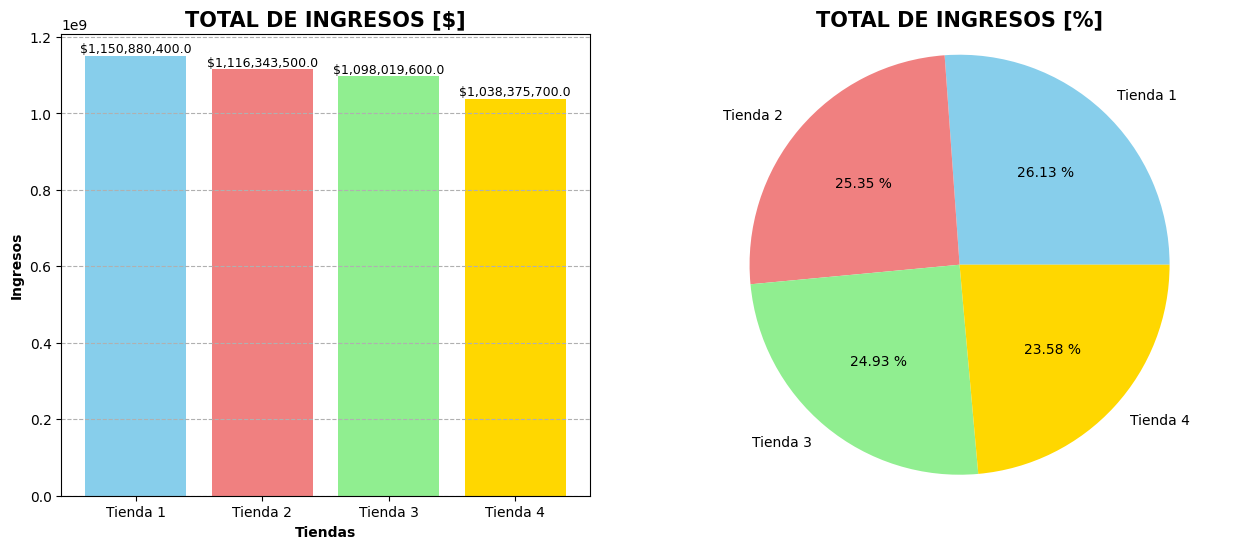

In [ ]:
#Visualización de datos
plt.figure(figsize=(15,6))
# Gráfica de barras
colores_barras = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon']
plt.subplot(1,2,1)
plt.title('TOTAL DE INGRESOS [$]', fontsize=15, fontweight='bold')
plt.bar(x = tiendas, height= ingresos_totales_tiendas, color=colores_barras)
plt.xlabel('Tiendas', fontweight='bold')
plt.ylabel('Ingresos', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=1)
for i, v in enumerate(ingresos_totales_tiendas):
    plt.text(i, v + 500, f'${v:,}', ha='center', va='bottom', fontsize=9, color='black')

#Gráfica de pastel
plt.subplot(1,2,2)
plt.title('TOTAL DE INGRESOS [%]', fontsize=15, fontweight='bold')
plt.pie(ingresos_totales_tiendas,labels=tiendas, autopct="%0.2f %%",colors=colores_barras) # autopct="%0.1f %%" saca los porcentaje de las porciones
plt.axis("equal") #Asegura que el gráfico de pastel sea un círculo perfecto
plt.show()

# 2. Ventas por categoría

In [ ]:
#Categorias de las tiendas
#categorias = pd.unique((tienda['Categoría del Producto'])) # valores unicos con la libreria de pandas
categorias = list(set(tienda['Categoría del Producto']))
categorias

['Electrónicos',
 'Artículos para el hogar',
 'Juguetes',
 'Instrumentos musicales',
 'Muebles',
 'Electrodomésticos',
 'Libros',
 'Deportes y diversión']

In [ ]:
'''
#Función que determina el número de productos vendidos por cada categoria de una tienda
def ventas_categorias(tienda):
  total_x_categoria = []
  for j in range(len(categorias)):
    total = 0
    for i in tienda['Categoría del Producto']:
      if i == categorias[j]:
        total+= 1
    total_x_categoria.insert(j,total)
  return total_x_categoria
ventas_total_x_categoria_x_tienda = [ventas_categorias(tienda),ventas_categorias(tienda2), ventas_categorias(tienda3),ventas_categorias(tienda4)]
print(ventas_total_x_categoria_x_tienda)'''

"\n#Función que determina el número de productos vendidos por cada categoria de una tienda\ndef ventas_categorias(tienda):\n  total_x_categoria = []\n  for j in range(len(categorias)):\n    total = 0\n    for i in tienda['Categoría del Producto']:\n      if i == categorias[j]:\n        total+= 1\n    total_x_categoria.insert(j,total)\n  return total_x_categoria\nventas_total_x_categoria_x_tienda = [ventas_categorias(tienda),ventas_categorias(tienda2), ventas_categorias(tienda3),ventas_categorias(tienda4)]\nprint(ventas_total_x_categoria_x_tienda)"

In [ ]:
#Función que determina el número de productos vendidos por cada categoria de una tienda
def ventas_categorias(tienda):
  indices = []
  conteo = []
  for i in range(len(categorias)):
    #creamos una lista con el total de productos vendidos por categorías
    tipos_categorias = [i for j in range(len(tienda['Categoría del Producto'])) if tienda['Categoría del Producto'][j]==categorias[i]]
    indices.append(tipos_categorias)
    conteo.append(len(indices[i]))
    #creamos una tupla con las categorias y el total de productos vendidos por categorias
    tupla_categorias_x_tienda = list(zip(categorias,conteo))
    # organizamos la lista de tuplas de categorías más vendidas a las menos vendidas
  return sorted(tupla_categorias_x_tienda, key=lambda tupla: tupla[1], reverse=True)

In [ ]:
ventas_total_x_categoria_x_tienda = [ventas_categorias(tienda),ventas_categorias(tienda2),ventas_categorias(tienda3),ventas_categorias(tienda4)]
print(ventas_total_x_categoria_x_tienda)

[[('Muebles', 465), ('Electrónicos', 448), ('Juguetes', 324), ('Electrodomésticos', 312), ('Deportes y diversión', 284), ('Instrumentos musicales', 182), ('Libros', 173), ('Artículos para el hogar', 171)], [('Muebles', 442), ('Electrónicos', 422), ('Juguetes', 313), ('Electrodomésticos', 305), ('Deportes y diversión', 275), ('Instrumentos musicales', 224), ('Libros', 197), ('Artículos para el hogar', 181)], [('Muebles', 499), ('Electrónicos', 451), ('Juguetes', 315), ('Electrodomésticos', 278), ('Deportes y diversión', 277), ('Libros', 185), ('Artículos para el hogar', 177), ('Instrumentos musicales', 177)], [('Muebles', 480), ('Electrónicos', 451), ('Juguetes', 338), ('Deportes y diversión', 277), ('Electrodomésticos', 254), ('Artículos para el hogar', 201), ('Libros', 187), ('Instrumentos musicales', 170)]]


In [ ]:
# creamos un diccionario con las categorías más vendidas a las menos vendidas por cada tienda
dicc_ventas_total_x_categoria_x_tienda = {
    'Tienda1': ventas_categorias(tienda),
    'Tienda2': ventas_categorias(tienda2),
    'Tienda3': ventas_categorias(tienda3),
    'Tienda4': ventas_categorias(tienda4)
    }
dicc_ventas_total_x_categoria_x_tienda

{'Tienda1': [('Muebles', 465),
  ('Electrónicos', 448),
  ('Juguetes', 324),
  ('Electrodomésticos', 312),
  ('Deportes y diversión', 284),
  ('Instrumentos musicales', 182),
  ('Libros', 173),
  ('Artículos para el hogar', 171)],
 'Tienda2': [('Muebles', 442),
  ('Electrónicos', 422),
  ('Juguetes', 313),
  ('Electrodomésticos', 305),
  ('Deportes y diversión', 275),
  ('Instrumentos musicales', 224),
  ('Libros', 197),
  ('Artículos para el hogar', 181)],
 'Tienda3': [('Muebles', 499),
  ('Electrónicos', 451),
  ('Juguetes', 315),
  ('Electrodomésticos', 278),
  ('Deportes y diversión', 277),
  ('Libros', 185),
  ('Artículos para el hogar', 177),
  ('Instrumentos musicales', 177)],
 'Tienda4': [('Muebles', 480),
  ('Electrónicos', 451),
  ('Juguetes', 338),
  ('Deportes y diversión', 277),
  ('Electrodomésticos', 254),
  ('Artículos para el hogar', 201),
  ('Libros', 187),
  ('Instrumentos musicales', 170)]}

Categorías más vendidas

In [ ]:
#Las 4 categorías más vendidas por tienda
categorias_mas_vendidas = [ventas_categorias(tienda), ventas_categorias(tienda2), ventas_categorias(tienda3), ventas_categorias(tienda4)]
categorias_mas_vendidas = [categorias_mas_vendidas[i][:4] for i in range(len(categorias_mas_vendidas))]
categorias_mas_vendidas

[[('Muebles', 465),
  ('Electrónicos', 448),
  ('Juguetes', 324),
  ('Electrodomésticos', 312)],
 [('Muebles', 442),
  ('Electrónicos', 422),
  ('Juguetes', 313),
  ('Electrodomésticos', 305)],
 [('Muebles', 499),
  ('Electrónicos', 451),
  ('Juguetes', 315),
  ('Electrodomésticos', 278)],
 [('Muebles', 480),
  ('Electrónicos', 451),
  ('Juguetes', 338),
  ('Deportes y diversión', 277)]]

In [ ]:
dicc_categorias_mas_vendidas = {tiendas:categorias for tiendas, categorias in zip(tiendas,categorias_mas_vendidas)}
dicc_categorias_mas_vendidas

{'Tienda 1': [('Muebles', 465),
  ('Electrónicos', 448),
  ('Juguetes', 324),
  ('Electrodomésticos', 312)],
 'Tienda 2': [('Muebles', 442),
  ('Electrónicos', 422),
  ('Juguetes', 313),
  ('Electrodomésticos', 305)],
 'Tienda 3': [('Muebles', 499),
  ('Electrónicos', 451),
  ('Juguetes', 315),
  ('Electrodomésticos', 278)],
 'Tienda 4': [('Muebles', 480),
  ('Electrónicos', 451),
  ('Juguetes', 338),
  ('Deportes y diversión', 277)]}

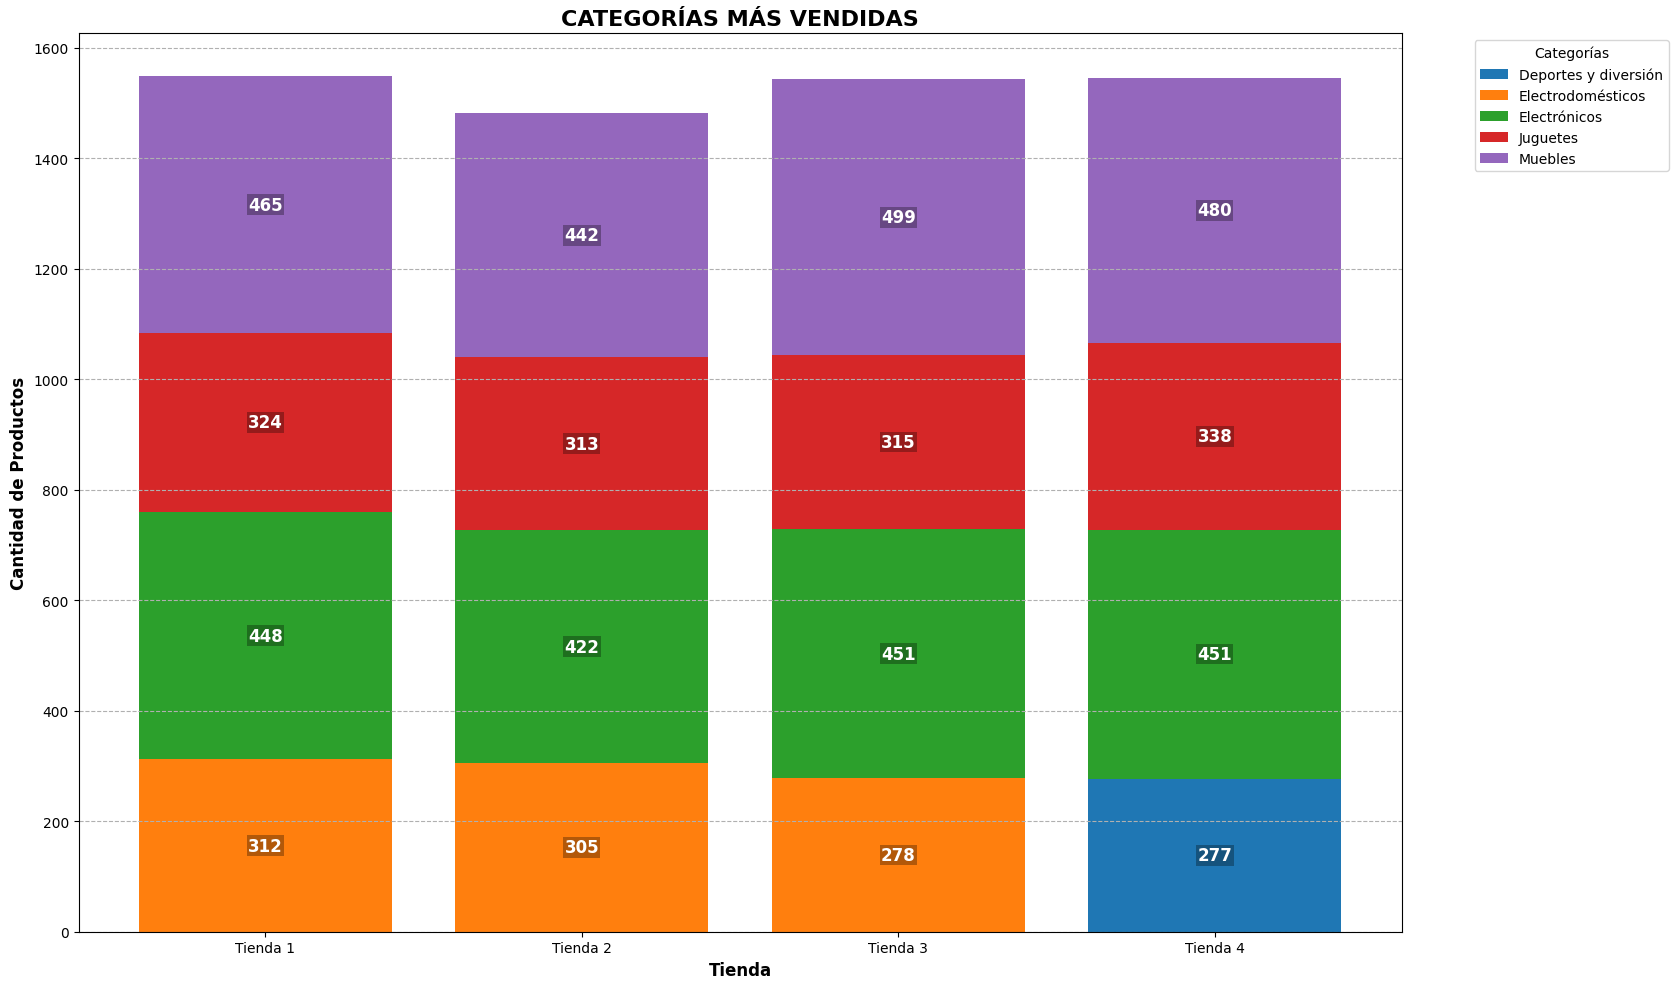

In [ ]:
#Visualización de datos
lista_df = []

#convertir el diccionario en una dataframe
#iteramos sobre el diccionario
for llave, valor in dicc_categorias_mas_vendidas.items():
  #iteramos sobre las listas de tuplas
  for categoria, cantidad in valor:
    lista_df.append({
        'Tienda' : llave,
        'Categoría' : categoria,
        'Cantidad' : cantidad
    })
df_top_ventas_categorias = pd.DataFrame(lista_df)

# pivoteamos el dataframe
# Esto transforma las filas de categorías en columnas y las tiendas como índice.
df_pivot = df_top_ventas_categorias.pivot_table(index='Tienda', columns='Categoría', values='Cantidad', fill_value=0)
# La base inicial para el apilamiento es cero
bottom = [0] * len(df_pivot) # Una lista de ceros del tamaño de la cantidad de tiendas
colores_categorias = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'
]

plt.figure(figsize=(20,10))
# Itera sobre cada categoría (columna del DataFrame pivotado) para dibujar sus barras
for i, categoria in enumerate(df_pivot.columns):
    bars = plt.bar(df_pivot.index, df_pivot[categoria], bottom=bottom, label=categoria, color=colores_categorias[i])
      # Añadir las cantidades a cada segmento de barra
    for j, bar in enumerate(bars):
        height = bar.get_height() # Altura del segmento actual
        if height > 0: # Solo si el segmento tiene un valor (no es cero)
            # Calcula la posición Y del texto (en el centro del segmento)
            yval = bottom[j] + height / 2
            # Añade el texto. bar.get_x() + bar.get_width()/2 es el centro de la barra en X
            plt.text(bar.get_x() + bar.get_width() / 2, yval,
                    f'{int(height)}', # Muestra el valor como entero
                    ha='center', va='center', color='white', fontsize=12, fontweight='bold',
                    bbox=dict(facecolor='black', alpha=0.3, edgecolor='none', pad=1)) # Fondo semitransparente
    # Actualiza la base para la siguiente capa de barras
    bottom = [sum(x) for x in zip(bottom, df_pivot[categoria])]

plt.title('CATEGORÍAS MÁS VENDIDAS', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de Productos', fontsize=12, fontweight='bold')
plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta el espacio para la leyenda
plt.show()


##Categoría con más ingresos

In [ ]:
#Definimos la función que determina el total de ingresos por categoría por tienda
def facturacion_x_categoria(tienda):
  lista_de_listas_ingresos_x_categoria = []
  ingresos_total_x_categoria = []
  for i in range(len(categorias)):
    #creamos una lista con los precios de cada categoría
    ingresos_x_categoria = [float(tienda['Precio'][j]) for j in range(len(tienda)) if tienda['Categoría del Producto'][j]==categorias[i]]
    # guardamos la lista anterior en una nueva lista
    lista_de_listas_ingresos_x_categoria.append(ingresos_x_categoria)
    #realizamos la sumatoria de cada lista (precios por categoria) que se encuentra dentro de la lista anterior
    ingresos_total_x_categoria.append(sum(lista_de_listas_ingresos_x_categoria[i]))
    tupla_ingresos_x_categorias = list(zip(categorias,ingresos_total_x_categoria))
  return sorted(tupla_ingresos_x_categorias, key= lambda tupla: tupla[1], reverse=True)

In [ ]:
#Ingresos totales por categoria por tienda
ingresos_totales_x_categoria_tienda = [facturacion_x_categoria(tienda),facturacion_x_categoria(tienda2),facturacion_x_categoria(tienda3),facturacion_x_categoria(tienda4)]
ingresos_totales_x_categoria_tienda

[[('Electrónicos', 429493500.0),
  ('Electrodomésticos', 363685200.0),
  ('Muebles', 187633700.0),
  ('Instrumentos musicales', 91299000.0),
  ('Deportes y diversión', 39290000.0),
  ('Juguetes', 17995700.0),
  ('Artículos para el hogar', 12698400.0),
  ('Libros', 8784900.0)],
 [('Electrónicos', 410831100.0),
  ('Electrodomésticos', 348567800.0),
  ('Muebles', 176426300.0),
  ('Instrumentos musicales', 104990300.0),
  ('Deportes y diversión', 34744500.0),
  ('Juguetes', 15945400.0),
  ('Artículos para el hogar', 14746900.0),
  ('Libros', 10091200.0)],
 [('Electrónicos', 410775800.0),
  ('Electrodomésticos', 329237900.0),
  ('Muebles', 201072100.0),
  ('Instrumentos musicales', 77380900.0),
  ('Deportes y diversión', 35593100.0),
  ('Juguetes', 19401100.0),
  ('Artículos para el hogar', 15060000.0),
  ('Libros', 9498700.0)],
 [('Electrónicos', 409476100.0),
  ('Electrodomésticos', 283260200.0),
  ('Muebles', 192528900.0),
  ('Instrumentos musicales', 75102400.0),
  ('Deportes y diversió

In [ ]:
#top 4 de los ingresos más altos por categoría por tienda
top_ingresos_totales_x_categoria_tienda = [ingresos_totales_x_categoria_tienda[i][:4] for i in range(len(tiendas))]
top_ingresos_totales_x_categoria_tienda

[[('Electrónicos', 429493500.0),
  ('Electrodomésticos', 363685200.0),
  ('Muebles', 187633700.0),
  ('Instrumentos musicales', 91299000.0)],
 [('Electrónicos', 410831100.0),
  ('Electrodomésticos', 348567800.0),
  ('Muebles', 176426300.0),
  ('Instrumentos musicales', 104990300.0)],
 [('Electrónicos', 410775800.0),
  ('Electrodomésticos', 329237900.0),
  ('Muebles', 201072100.0),
  ('Instrumentos musicales', 77380900.0)],
 [('Electrónicos', 409476100.0),
  ('Electrodomésticos', 283260200.0),
  ('Muebles', 192528900.0),
  ('Instrumentos musicales', 75102400.0)]]

In [ ]:
#diccionario del top 4 de ingresos totales por categorias
dicc_top_ingresos_totales_x_categoria_tienda = {tienda:tupla for tienda,tupla in zip(tiendas,top_ingresos_totales_x_categoria_tienda)}
dicc_top_ingresos_totales_x_categoria_tienda

{'Tienda 1': [('Electrónicos', 429493500.0),
  ('Electrodomésticos', 363685200.0),
  ('Muebles', 187633700.0),
  ('Instrumentos musicales', 91299000.0)],
 'Tienda 2': [('Electrónicos', 410831100.0),
  ('Electrodomésticos', 348567800.0),
  ('Muebles', 176426300.0),
  ('Instrumentos musicales', 104990300.0)],
 'Tienda 3': [('Electrónicos', 410775800.0),
  ('Electrodomésticos', 329237900.0),
  ('Muebles', 201072100.0),
  ('Instrumentos musicales', 77380900.0)],
 'Tienda 4': [('Electrónicos', 409476100.0),
  ('Electrodomésticos', 283260200.0),
  ('Muebles', 192528900.0),
  ('Instrumentos musicales', 75102400.0)]}

# 3. Calificación promedio de la tienda


In [ ]:
# escala de calificacion
calificacion = list(set(tienda['Calificación']))
calificacion

[1, 2, 3, 4, 5]

In [ ]:
#Funcion lambda que determina el promedio de la calificación de cada tienda
calificacion_promedio = lambda tienda: round(sum(tienda['Calificación'])/len(tienda),2)
calificacion_x_tienda = [calificacion_promedio(tienda),calificacion_promedio(tienda2),calificacion_promedio(tienda3),calificacion_promedio(tienda4)]
#Determinamos la tienda con peor calificación
tienda_peor_calificacion = min(calificacion_x_tienda)
print(f'Calificación promedio por cada tienda: {calificacion_x_tienda}\n')
print(f'La tienda con peor calificación es la {tiendas[calificacion_x_tienda.index(tienda_peor_calificacion)]} ---> {tienda_peor_calificacion}')

Calificación promedio por cada tienda: [3.98, 4.04, 4.05, 4.0]

La tienda con peor calificación es la Tienda 1 ---> 3.98


# 4. Productos más y menos vendidos

In [ ]:
#Productos que se venden en cada tienda
productos = list(set(tienda['Producto']))
print(f'Total de productos: {len(productos)}')
productos

Total de productos: 51


['Dashboards con Power BI',
 'Mesa de comedor',
 'Lavavajillas',
 'Bicicleta',
 'Mesa de centro',
 'Cama king',
 'Lavadora de ropa',
 'Cubo mágico 8x8',
 'Mochila',
 'Balón de baloncesto',
 'Ajedrez de madera',
 'Ciencia de datos con Python',
 'Guitarra eléctrica',
 'Refrigerador',
 'Sillón',
 'Auriculares con micrófono',
 'Juego de mesa',
 'Batería',
 'Olla de presión',
 'Pandereta',
 'Dinosaurio Rex',
 'Impresora',
 'TV LED UHD 4K',
 'Celular ABXY',
 'Modelado predictivo',
 'Silla de oficina',
 'Smart TV',
 'Iniciando en programación',
 'Armario',
 'Secadora de ropa',
 'Cubertería',
 'Cama box',
 'Set de ollas',
 'Auriculares',
 'Set de vasos',
 'Mesa de noche',
 'Muñeca bebé',
 'Microondas',
 'Smartwatch',
 'Cuerda para saltar',
 'Bloques de construcción',
 'Tablet ABXY',
 'Guitarra acústica',
 'Kit de bancas',
 'Balón de voleibol',
 'Sofá reclinable',
 'Asistente virtual',
 'Carrito de control remoto',
 'Estufa',
 'Iphone 15',
 'Vaso térmico']

In [ ]:
# Función que determina el total de ventas por producto
def ventas_productos(tienda):
  lista_productos = []
  total_productos = []
  tuplas_ventas_x_producto = 0
  for i in range(len(productos)):
    lista_productos = [i for j in tienda['Producto'] if j == productos[i]]
    #creamos una lista con el total de productos vendidos por tienda
    total_productos.append(len(lista_productos))
  #creamos una tupla con los productos y el total de productos vendidos
  tuplas_ventas_x_producto = list(zip(productos,total_productos))
  # organizamos la lista de tuplas de productos más vendidos a los menos vendidos
  return sorted(tuplas_ventas_x_producto,key=lambda a: a[1], reverse=True)

In [ ]:
# creamos un diccionario con los productos más vendidos a los menos vendidos por cada tienda
dicc_productos_vendidos_x_tienda = {
    'Tienda1': ventas_productos(tienda),
    'Tienda2': ventas_productos(tienda2),
    'Tienda3': ventas_productos(tienda3),
    'Tienda4': ventas_productos(tienda4),
}
dicc_productos_vendidos_x_tienda

{'Tienda1': [('TV LED UHD 4K', 60),
  ('Armario', 60),
  ('Microondas', 60),
  ('Secadora de ropa', 58),
  ('Mesa de noche', 56),
  ('Bloques de construcción', 56),
  ('Balón de baloncesto', 55),
  ('Bicicleta', 54),
  ('Refrigerador', 54),
  ('Impresora', 54),
  ('Vaso térmico', 54),
  ('Batería', 53),
  ('Cubertería', 52),
  ('Carrito de control remoto', 52),
  ('Modelado predictivo', 51),
  ('Auriculares', 50),
  ('Ajedrez de madera', 49),
  ('Iphone 15', 49),
  ('Lavavajillas', 48),
  ('Lavadora de ropa', 47),
  ('Guitarra eléctrica', 47),
  ('Silla de oficina', 46),
  ('Guitarra acústica', 46),
  ('Sofá reclinable', 46),
  ('Estufa', 45),
  ('Mesa de centro', 44),
  ('Cama king', 44),
  ('Cubo mágico 8x8', 44),
  ('Smart TV', 44),
  ('Cama box', 44),
  ('Kit de bancas', 44),
  ('Juego de mesa', 43),
  ('Set de ollas', 43),
  ('Smartwatch', 43),
  ('Dashboards con Power BI', 42),
  ('Tablet ABXY', 42),
  ('Balón de voleibol', 42),
  ('Sillón', 41),
  ('Iniciando en programación', 4

##Productos más vendidos

In [ ]:
# Los productos más vendidos por tienda
productos_mas_vendidos = [ventas_productos(tienda), ventas_productos(tienda2), ventas_productos(tienda3), ventas_productos(tienda4)]
productos_mas_vendidos = [productos_mas_vendidos[i][:5] for i in range(len(productos_mas_vendidos))]
productos_mas_vendidos

[[('TV LED UHD 4K', 60),
  ('Armario', 60),
  ('Microondas', 60),
  ('Secadora de ropa', 58),
  ('Mesa de noche', 56)],
 [('Iniciando en programación', 65),
  ('Microondas', 62),
  ('Batería', 61),
  ('Pandereta', 58),
  ('Guitarra acústica', 58)],
 [('Kit de bancas', 57),
  ('Mesa de comedor', 56),
  ('Cama king', 56),
  ('Set de ollas', 55),
  ('Mesa de noche', 55)],
 [('Cama box', 62),
  ('Cubertería', 59),
  ('Dashboards con Power BI', 56),
  ('Cama king', 56),
  ('Mesa de comedor', 55)]]

In [ ]:
# Los productos más vendidos por tienda
dicc_productos_mas_vendidos = {tiendas:productos for tiendas,productos in zip(tiendas,productos_mas_vendidos)}
dicc_productos_mas_vendidos

{'Tienda 1': [('TV LED UHD 4K', 60),
  ('Armario', 60),
  ('Microondas', 60),
  ('Secadora de ropa', 58),
  ('Mesa de noche', 56)],
 'Tienda 2': [('Iniciando en programación', 65),
  ('Microondas', 62),
  ('Batería', 61),
  ('Pandereta', 58),
  ('Guitarra acústica', 58)],
 'Tienda 3': [('Kit de bancas', 57),
  ('Mesa de comedor', 56),
  ('Cama king', 56),
  ('Set de ollas', 55),
  ('Mesa de noche', 55)],
 'Tienda 4': [('Cama box', 62),
  ('Cubertería', 59),
  ('Dashboards con Power BI', 56),
  ('Cama king', 56),
  ('Mesa de comedor', 55)]}

In [ ]:
def parametros_grafico(titulo):
  plt.title(titulo, fontweight='bold')
  plt.xlabel('Productos', fontweight='bold')
  plt.ylabel('Cantidad', fontweight='bold')
  plt.grid(axis='y', linestyle='--', alpha=1)
  plt.xticks(rotation=45, ha='right', fontsize=10) # Rota 45 grados y alinea a la derecha, reduce el tamaño de fuente
  plt.tight_layout()  # Ajustar el diseño para que las etiquetas no se corten
  return

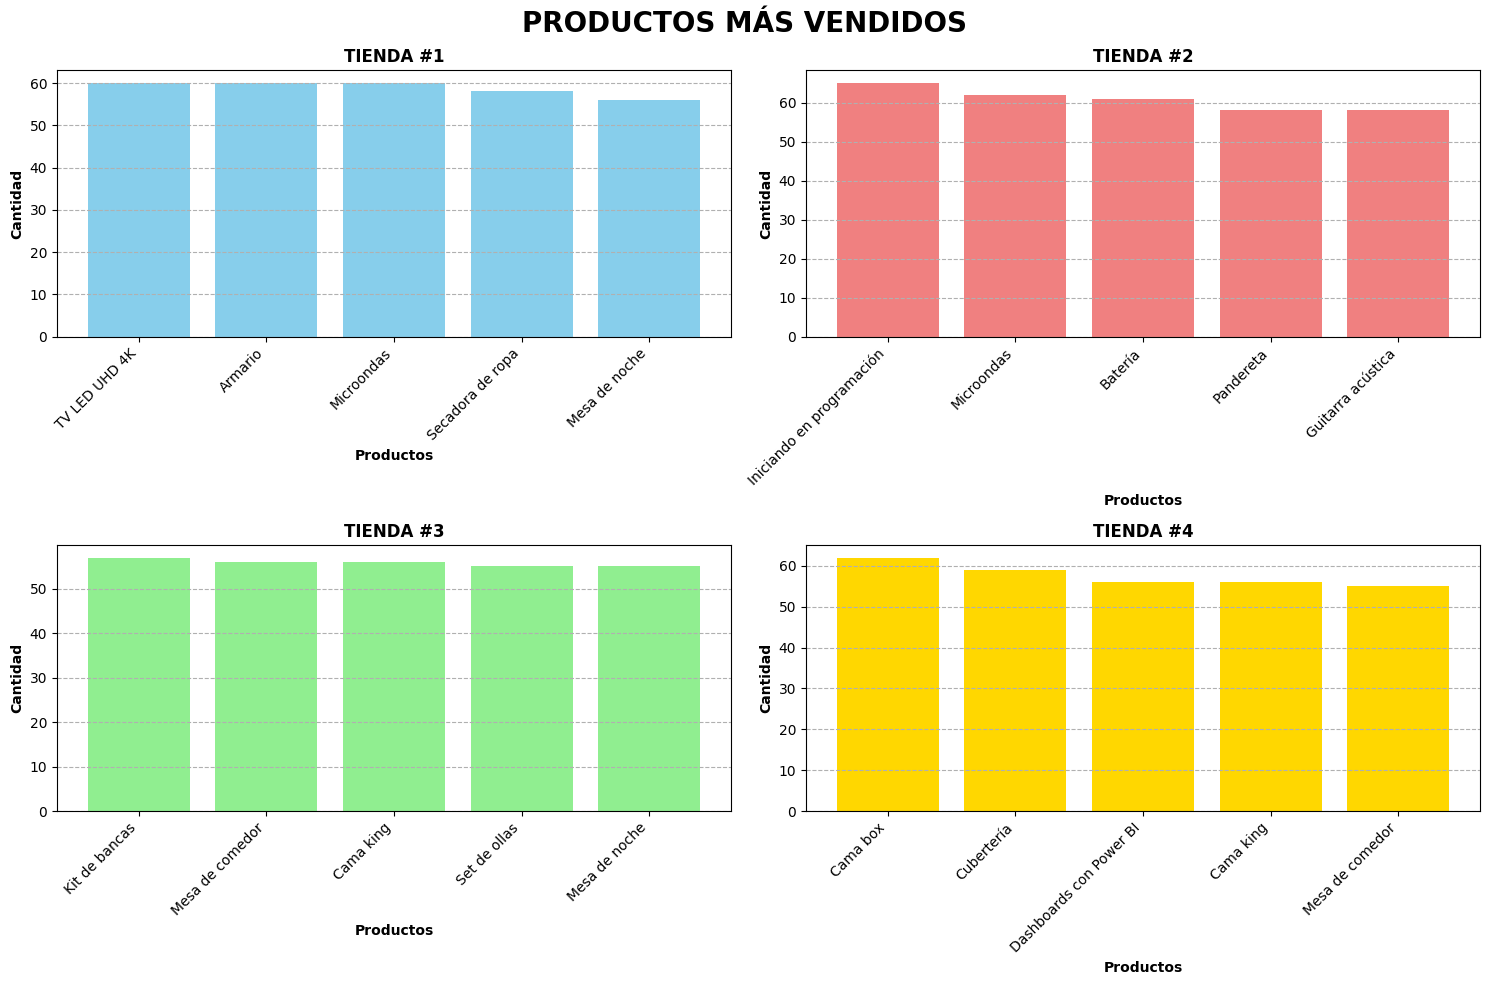

In [ ]:
#Visualización de datos
lista_df2 = []

tiendas
productos_mas_vendidos

# Convertimos el diccionario en un dataframe
for llave, valor in dicc_productos_mas_vendidos.items():
   # iteramos sobre las tuplas
   for producto, cantidad in valor:
    lista_df2.append({
        'Producto' : producto,
        'Tienda' : llave,
        'Cantidad' : cantidad
        })
df_top_ventas_productos = pd.DataFrame(lista_df2)

#crea una nueva forma
plt.figure(figsize=(15,10))
plt.suptitle('PRODUCTOS MÁS VENDIDOS', fontsize= 20, fontweight='bold')
colores_barras = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon']

#Tienda #1
plt.subplot(2,2,1) # filas, columnas, gráfico
plt.bar(x=df_top_ventas_productos.loc[0:4,'Producto'], height=df_top_ventas_productos.loc[0:4,'Cantidad'], color = colores_barras[0])
parametros_grafico('TIENDA #1')

#Tienda #2
plt.subplot(2,2,2)
plt.bar(x=df_top_ventas_productos.loc[5:9,'Producto'], height=df_top_ventas_productos.loc[5:9,'Cantidad'], color = colores_barras[1])
parametros_grafico('TIENDA #2')

#Tienda #3
plt.subplot(2,2,3)
plt.bar(x=df_top_ventas_productos.loc[10:14,'Producto'], height=df_top_ventas_productos.loc[10:14,'Cantidad'], color = colores_barras[2])
parametros_grafico('TIENDA #3')

#Tienda #4
plt.subplot(2,2,4)
plt.bar(x=df_top_ventas_productos.loc[15:,'Producto'], height=df_top_ventas_productos.loc[15:,'Cantidad'], color = colores_barras[3])
parametros_grafico('TIENDA #4')

plt.show()


##Productos menos vendidos

In [ ]:
#Los productos menos vendidos de cada tienda
productos_menos_vendidos = [ventas_productos(tienda), ventas_productos(tienda2), ventas_productos(tienda3), ventas_productos(tienda4)]
productos_menos_vendidos = [productos_menos_vendidos[i][-5:] for i in range(len(productos_menos_vendidos))]
print(productos_menos_vendidos)

[[('Ciencia de datos con Python', 39), ('Pandereta', 36), ('Olla de presión', 35), ('Auriculares con micrófono', 33), ('Celular ABXY', 33)], [('Auriculares', 37), ('Sillón', 35), ('Mesa de comedor', 34), ('Impresora', 34), ('Juego de mesa', 32)], [('Vaso térmico', 38), ('Mochila', 36), ('Set de vasos', 36), ('Microondas', 36), ('Bloques de construcción', 35)], [('Ciencia de datos con Python', 38), ('Refrigerador', 38), ('Guitarra acústica', 37), ('Armario', 34), ('Guitarra eléctrica', 33)]]


In [ ]:
#Los productos menos vendidos de cada tienda
dicc_productos_menos_vendidos = {tiendas:productos for tiendas, productos in zip(tiendas,productos_menos_vendidos)}
dicc_productos_menos_vendidos

{'Tienda 1': [('Ciencia de datos con Python', 39),
  ('Pandereta', 36),
  ('Olla de presión', 35),
  ('Auriculares con micrófono', 33),
  ('Celular ABXY', 33)],
 'Tienda 2': [('Auriculares', 37),
  ('Sillón', 35),
  ('Mesa de comedor', 34),
  ('Impresora', 34),
  ('Juego de mesa', 32)],
 'Tienda 3': [('Vaso térmico', 38),
  ('Mochila', 36),
  ('Set de vasos', 36),
  ('Microondas', 36),
  ('Bloques de construcción', 35)],
 'Tienda 4': [('Ciencia de datos con Python', 38),
  ('Refrigerador', 38),
  ('Guitarra acústica', 37),
  ('Armario', 34),
  ('Guitarra eléctrica', 33)]}

# 5. Envío promedio por tienda

In [ ]:
#Funcion lambda que determina el promedio de la calificación de cada tienda
promedio_costo_envio = lambda tienda: round(sum(tienda['Costo de envío'])/len(tienda),2)
promedio_costo_envio_x_tienda = [promedio_costo_envio(tienda),promedio_costo_envio(tienda2),promedio_costo_envio(tienda3),promedio_costo_envio(tienda4)]
#Determinamos la tienda con los costos de envío más bajos
costo_menor_envio = min(promedio_costo_envio_x_tienda)
print(f'Promedio de costos de envío por tienda: {promedio_costo_envio_x_tienda}\n')
print(f'La tienda con el costo promedio menor de envío es la {tiendas[promedio_costo_envio_x_tienda.index(costo_menor_envio)]} ---> ${costo_menor_envio:,}')

Promedio de costos de envío por tienda: [26018.61, 25216.24, 24805.68, 23459.46]

La tienda con el costo promedio menor de envío es la Tienda 4 ---> $23,459.46


#6. Informe final


El señor Juan debe decidir qué tienda vender para invertir en un nuevo negocio. Para ello, se realizó un análisis de ventas y rendimiento sobre cuatro tiendas para determinar cuál tienda tiene un menor desempeño, permitiendo al señor Juan tomar una decisión basada en los siguientes aspectos:  facturación total de cada tienda, categorías más populares, promedio de evaluación de cada uno de los clientes, productos más y menos vendidos en cada tienda y costo promedio del envío desde la tienda hasta el lugar de cada uno de los clientes.

###1. Facturación de cada tienda:
      Ingresos totales tienda#1: 1'150.880.400 COP
      Ingresos Totales tienda#2: 1'116.343.500 COP
      Ingresos Totales tienda#3: 1'098.019.600 COP
      Ingresos Totales tienda#4: 1'038.375.700 COP
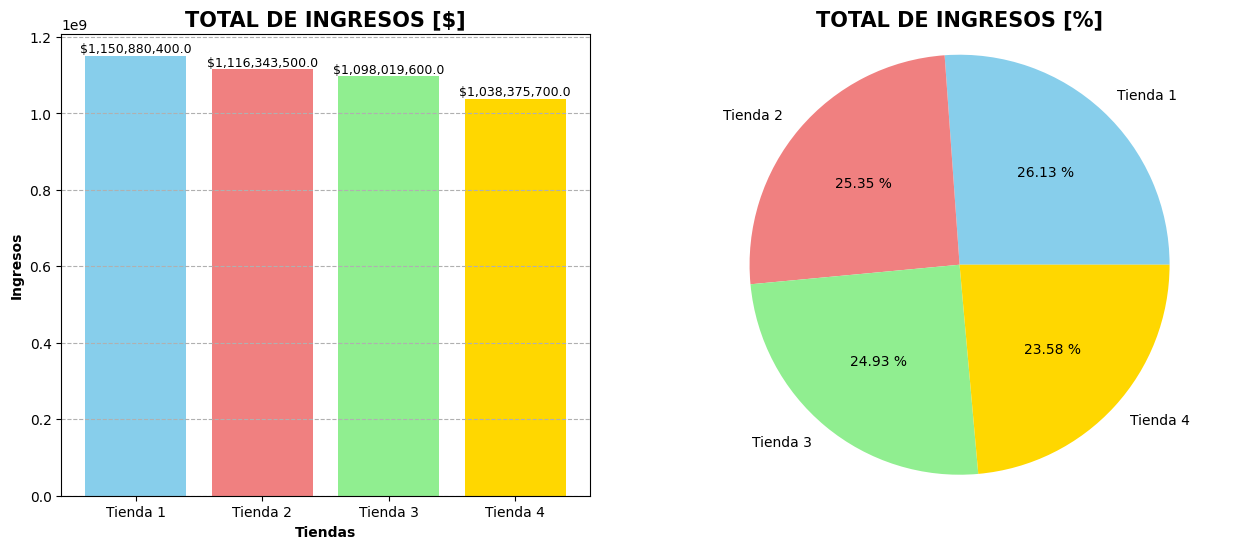


La tienda que más factura es la tienda #1 con un aporte del 26.13 %  y la que menos ingresos genera es la tienda #4 con una cifra del 23.58% sobre los ingresos totales de las 4 tiendas.

###2. Categorías más vendidas:
      De las 8 categorías que ofrece la tiendas del señor Juan, las 4 más populares por tienda son:
   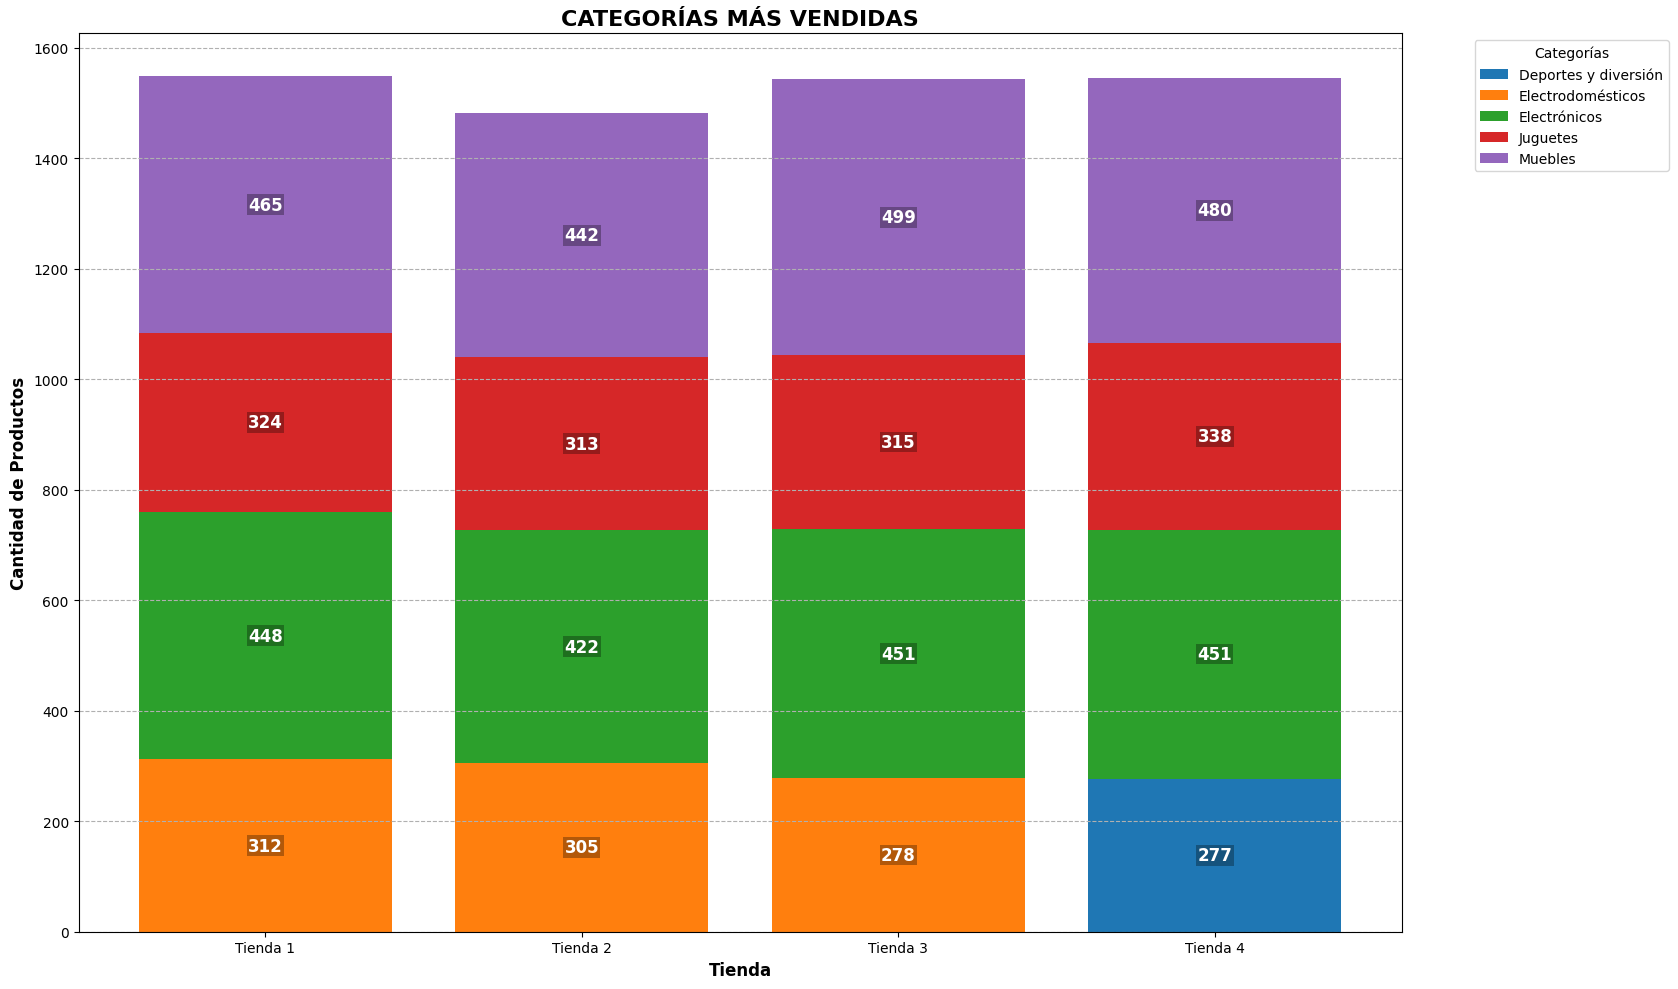


Las categorías más populares son: los muebles, juguetes, electrodomésticos y electrónicos; sin embargo, en la tienda #4 una de sus categorías más vendidas es: deportes y diversión; en vez de la catgoría de los electrodomésticos como en el resto de las tiendas.

###3. Calificación promedio de cada tienda
     Calificación promedio tienda #1: 3.98 puntos
     Calificación promedio tienda #2: 4.04 puntos
     Calificación promedio tienda #3: 4.05 puntos
     Calificación promedio tienda #4: 4.0 puntos
      
La tienda con peor calificación es la Tienda #1 con 3.98 puntos y la tienda con mejor calificación es la tienda #4, la cuál irónicamente es la tienda que menos ingresos genera.

###4. Productos más y menos vendidos
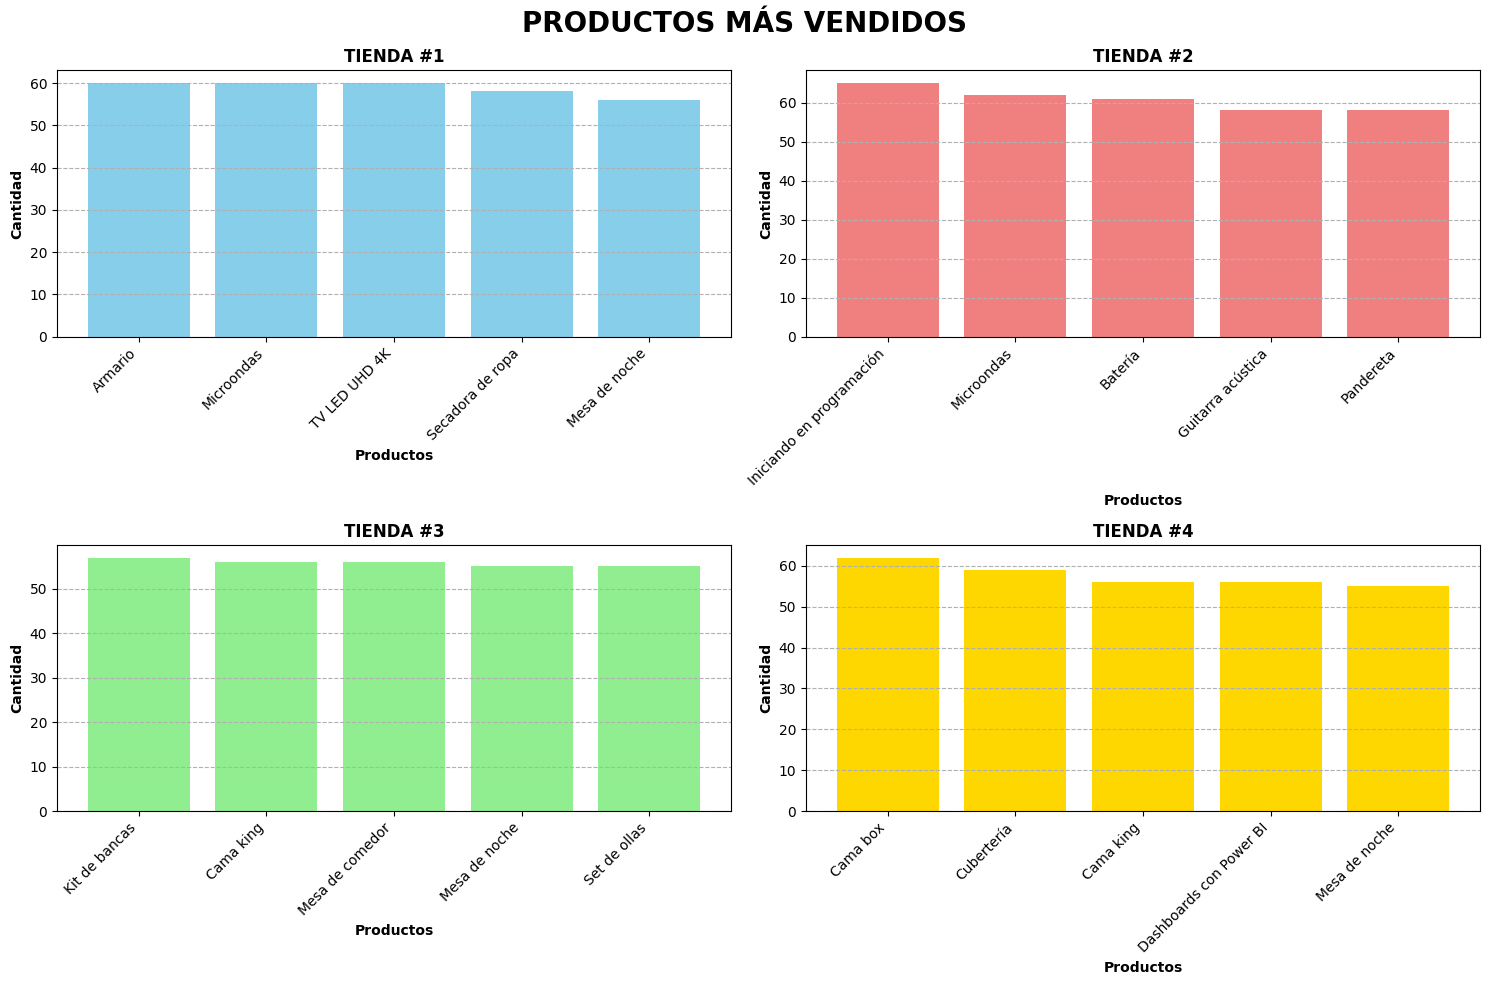

###5. Envío promedio por tienda
      Costo envío promedio tienda #1: 26 018 COP
      Costo envío promedio tienda #2: 25 216 COP
      Costo envío promedio tienda #3: 24 805 COP
      Costo envío promedio tienda #4: 23 459 COP

La tienda con el costo promedio mayor de envío es la Tienda #1 Con 26 018 COP y la tienda con el costo promedio menor de envío es la tienda #4 con 23 456 COP

##Conclusión
Teniendo en cuenta los resultados de los análisis se puede concluir que la tienda que el señor Juan debería vender es la tienda #4. Esta afirmación se basa en que la tienda #4 es la que menos ingresos generó.

En la métrica de costos de envío, reflejó el costo de envío más bajo. Esto podría señalar que es la tienda en la que se realizan menos compras, lo cual representa un impacto en los ingresos de la tienda tal como se evidenció en la métrica número 1. Por otro lado, puede deberse también a que los envíos se realizan a distancias más cortas (para comprobar esto se sugiere hacer análisis de zonas geográficas). Por último, la satisfacción del cliente fue ligeramente superior a la tienda #1, teniendo esta última la peor calificación, sin embargo, su baja calificación se compensa con el total de ingresos al ser los más altos de las 4 tiendas, mientras que la tienda #4 queda por debajo de la tienda #2 y 3 sin lograr compensarlo con el total de sus ingresos.